# Text Analytics on Student Feedback



## Introduction

Text analytics techniques are applied to analyze unstructured student feedback data. The objective is to extract meaningful insights such as sentiment patterns and common themes that complement quantitative performance analysis and support academic decision-making.


## Dataset Description

The dataset consists of short textual feedback provided by students regarding courses and learning experiences. This unstructured data is used to demonstrate text preprocessing and sentiment analysis as part of the data science workflow.


In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from textblob import TextBlob


In [2]:
df_text = pd.read_csv("../data/student_feedback.csv")

df_text.head()


,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


## Dataset Preparation

The student feedback dataset contains multiple textual attributes corresponding to different aspects of the learning experience, such as teaching quality, course content, examinations, laboratory work, library facilities, and extracurricular activities. These attributes are unstructured in nature and collectively represent student feedback.


In [3]:
df_text.columns


Index(['teaching', 'teaching.1', 'coursecontent', 'coursecontent.1',
       'examination', 'Examination', 'labwork', 'labwork.1',
       'library_facilities', ' library_facilities', 'extracurricular',
       'extracurricular.1'],
      dtype='object')

In [4]:
text_columns = [
    'teaching', 'teaching.1',
    'coursecontent', 'coursecontent.1',
    'examination', 'Examination',
    'labwork', 'labwork.1',
    'library_facilities', ' library_facilities',
    'extracurricular', 'extracurricular.1'
]


## Text Consolidation

Since the dataset contains multiple feedback-related columns, all textual attributes are combined into a single consolidated feedback corpus. This unified text representation enables consistent preprocessing, sentiment analysis, and topic modeling across all feedback aspects.


In [5]:
df_text['feedback'] = df_text[text_columns].astype(str).agg(' '.join, axis=1)


In [6]:
df_text['feedback']


0      0 teacher are punctual but they should also gi...
1      1 Good  -1.0 Not good 1.0 Good 1 Good  -1.0 No...
2      1 Excellent lectures are delivered by teachers...
3      1 Good -1.0 Content of course is perfectly in ...
4      1 teachers give us all the information require...
                             ...                        
180    1 intraction is good and leacture delivery als...
181    1 all the given terms are good regarding the u...
182    1 All the terms are good regarding the univers...
183    -1 Some of the teacher are un experienced. Als...
184    1 IT IS GOING GOOD -1.0 HAVE TO IMPROVE 0.0 PA...
Name: feedback, Length: 185, dtype: object

### Note:
> The dataset contains multiple feedback attributes corresponding to different aspects of student experience. These attributes were combined into a single textual corpus to facilitate unified text preprocessing and analysis.


## Text Preprocessing

Text preprocessing is performed to clean and normalize raw feedback text before analysis.


In [7]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df_text["clean_feedback"] = df_text["feedback"].apply(clean_text)


## Sentiment Analysis

Sentiment analysis is used to identify the emotional tone of student feedback. Each feedback entry is assigned a sentiment polarity score ranging from negative to positive.


In [8]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_text["sentiment_score"] = df_text["clean_feedback"].apply(get_sentiment)


In [9]:
df_text["sentiment_label"] = pd.cut(
    df_text["sentiment_score"],
    bins=[-1, -0.1, 0.1, 1],
    labels=["Negative", "Neutral", "Positive"]
)

df_text["sentiment_label"].value_counts()


sentiment_label
Positive    178
Neutral       7
Negative      0
Name: count, dtype: int64

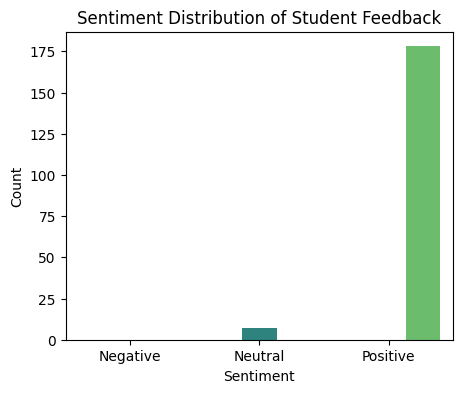

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(
    x="sentiment_label",
    hue="sentiment_label",
    data=df_text,
    palette="viridis",
    legend=False
)
plt.title("Sentiment Distribution of Student Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [11]:
df_text["sentiment_score"].describe()


count    185.000000
mean       0.496857
std        0.200842
min       -0.100000
25%        0.365874
50%        0.512500
75%        0.662000
max        0.900000
Name: sentiment_score, dtype: float64

### Observation:
The sentiment scores are predominantly positive, with a mean sentiment value of approximately 0.50. The absence of strong negative sentiment indicates that the student feedback in the dataset reflects generally favorable or neutral perceptions rather than explicit dissatisfaction.


## TF-IDF Vectorization

TF-IDF is used to convert textual feedback into numerical features that reflect the importance of words across the dataset.


In [12]:
tfidf = TfidfVectorizer(stop_words="english", max_features=500)
X_tfidf = tfidf.fit_transform(df_text["clean_feedback"])


## Topic Clustering

K-Means clustering is applied to group feedback into thematic clusters based on textual similarity.


In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_text["topic_cluster"] = kmeans.fit_predict(X_tfidf)


In [14]:
df_text["topic_cluster"].value_counts()


topic_cluster
0    104
1     53
2     28
Name: count, dtype: int64

## Topic Interpretation

The clusters represent different themes present in student feedback, such as course difficulty, teaching quality, and learning resources. These themes provide qualitative insights that complement quantitative academic analysis.


## Decision Support Perspective

Text analytics enables institutions to understand student perceptions and sentiment trends. When combined with performance analytics, feedback analysis helps identify areas requiring academic improvement and enhances data-driven decision-making.


## Conclusion

Text analytics techniques were successfully applied to analyze unstructured student feedback data. Sentiment analysis revealed overall student perception, while topic clustering identified common feedback themes. These qualitative insights complement structured performance analysis and strengthen the decision support system.
